In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from HDF5Dataset import HDF5Dataset
from math import sqrt
import matplotlib

# Create the dataset
rng = np.random.RandomState(1)

filename = "/home/erynqian/10701/19F10701_Project/testData/sampled/first365_withoutOneHot.hdf5"
ds = HDF5Dataset(filename)
X, y, valX, valY = ds.train_val_test()

num of features 9
valX:  (6711, 9) valY: (6711,)
trainX:  (664412, 9) trainY: (664412,)


In [6]:
model_name = 'adaboost'

In [7]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=5)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),
                          n_estimators=300, random_state=rng, learning_rate=0.5)

regr_1.fit(X, y)
regr_2.fit(X, y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=5,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [8]:
# Predict
y_1 = regr_1.predict(valX)
y_2 = regr_2.predict(valX)

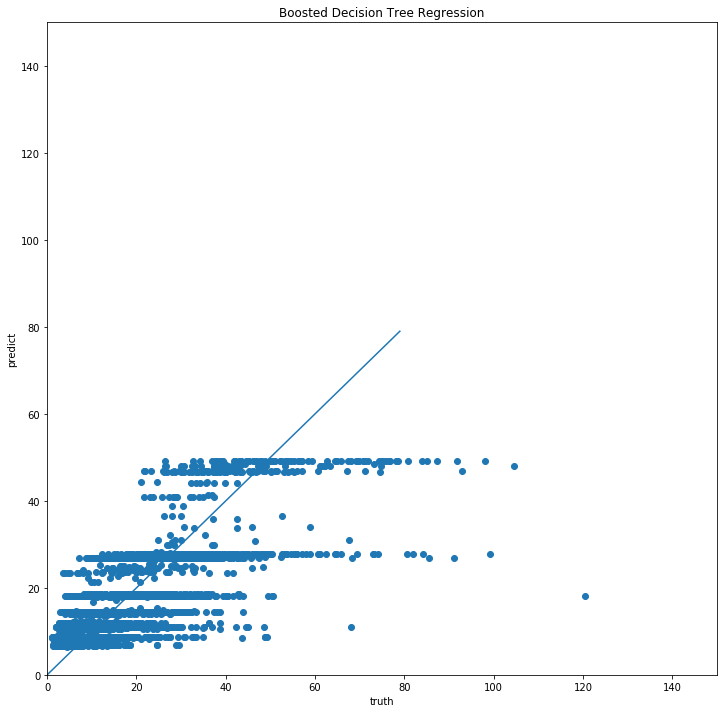

In [12]:
# Plot the results
plt.rcParams["figure.figsize"] = (12, 12)
plt.figure()
plt.scatter(valY, y_2)
plt.xlabel("truth")
plt.ylabel("predict")
plt.ylim((0,150))
plt.xlim((0,150))
plt.plot(list(range(80)))
plt.title("Boosted Decision Tree Regression")
plt.savefig(model_name + ".png")


In [10]:
# RMSE
err = 0
for i,j in zip(y, y_2):
    err += (i-j)**2
err = err / len(y)
err = sqrt(err)
print("RMSE:", err)

# Absolute error
from sklearn.metrics import mean_absolute_error
print("mean_absolute_error: ", mean_absolute_error(valY, y_2))

RMSE: 1.3952631244646632
mean_absolute_error:  5.474632489271272
